<a href="https://colab.research.google.com/github/Roooiz/Classic-ML/blob/main/notebooks/EDA_netflix_recomedation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [2]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_overall.shape

(8807, 12)

## Проверка пустых значений

In [4]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Разделение на фильмы и сериалы

In [6]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [7]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


netflix_movies = 6131
netflix_shows = 2676


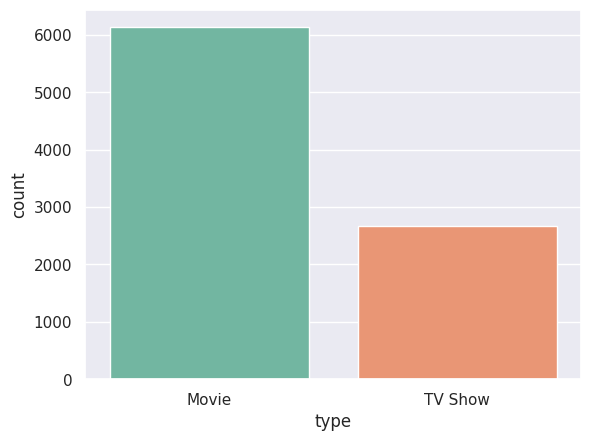

In [8]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix_overall, palette='Set2')

print('netflix_movies =', len(netflix_movies))
print('netflix_shows =', len(netflix_shows))

# Популярное время длительности

In [9]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [10]:
from plotly import graph_objects as go

fig = go.Figure([
    go.Bar(x=topdirs.index, y=topdirs.values, text=topdirs.values, marker_color='indianred')
])

fig.update_traces(texttemplate='%text: .2s', textposition='outside')
fig.show()

# Анализ фильмов

## Какой месяц, самый привлекательный для релиза контента?

Месяц с наименьшим количеством контента

In [11]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [13]:
netflix_date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [14]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


Смотрим когда добавился самый первый фильм на платформу

In [15]:
netflix_date.sort_values(by=['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


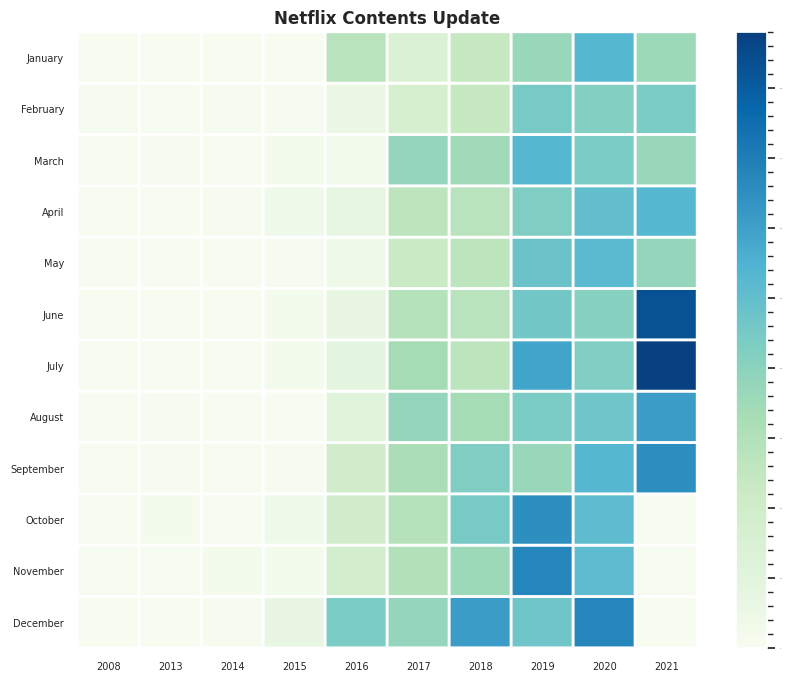

In [17]:
plt.figure(figsize=(10, 8), dpi=100)
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
char = plt.colorbar()

char.ax.tick_params(labelsize=0)
char.ax.minorticks_on()
plt.show()

## Анализ рейтингов фильмов

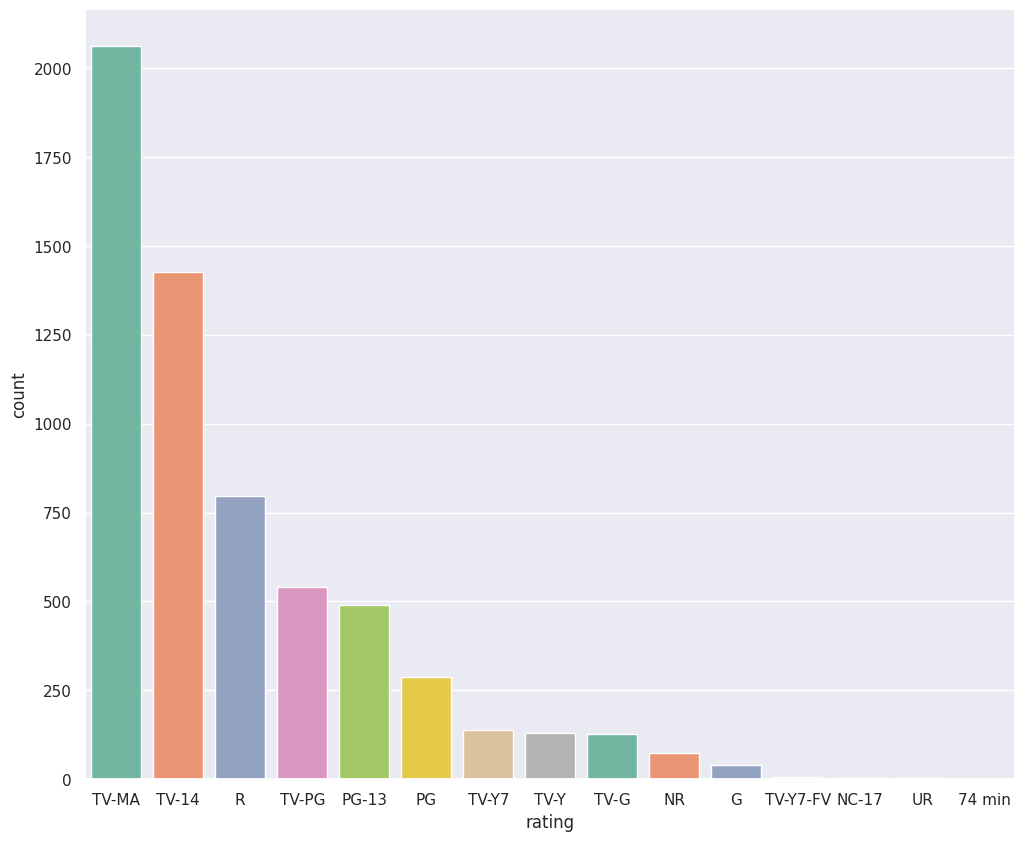

In [18]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

- TV-MA - самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории
- TV-14 - вторая по величине группа. Контент фильма с таким рейтингом не подходит для детей младше 14 лет
- R - фильмы не подходят детям до 17 лет


## Анализ года выпуска фильма

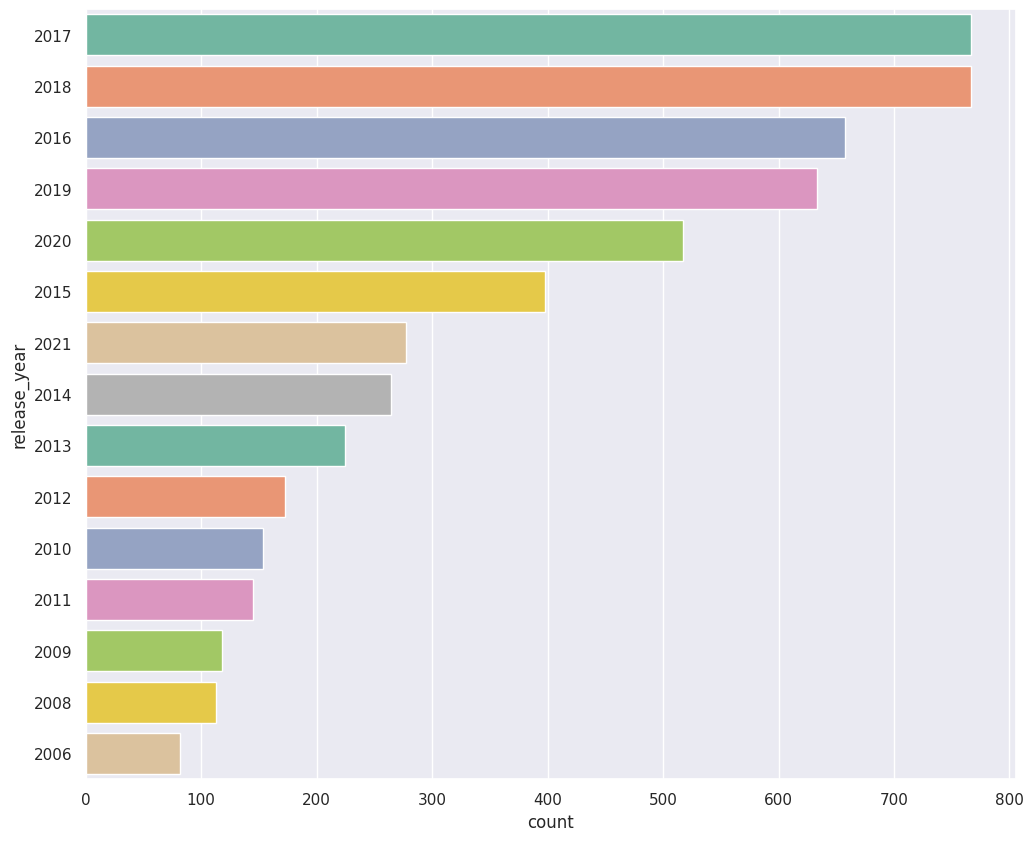

In [19]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

В 2017 выходило больше всех фильмов

## Топ 10 стран, которые выпускают фильмы

Проверим пропуски в столбце `country`

In [20]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [21]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

Пропусков больше нет

In [22]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [23]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
  i = i.replace(' ', '')
  i = list(i.split(','))

  for j in i:
    if j in list(countries_mov.keys()):
      countries_mov[j]+=1
    else:
      countries_mov[j]=1

In [24]:
countries_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [25]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [26]:
names = [name for name, value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [27]:
values = [value for name, value in countries_fin]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

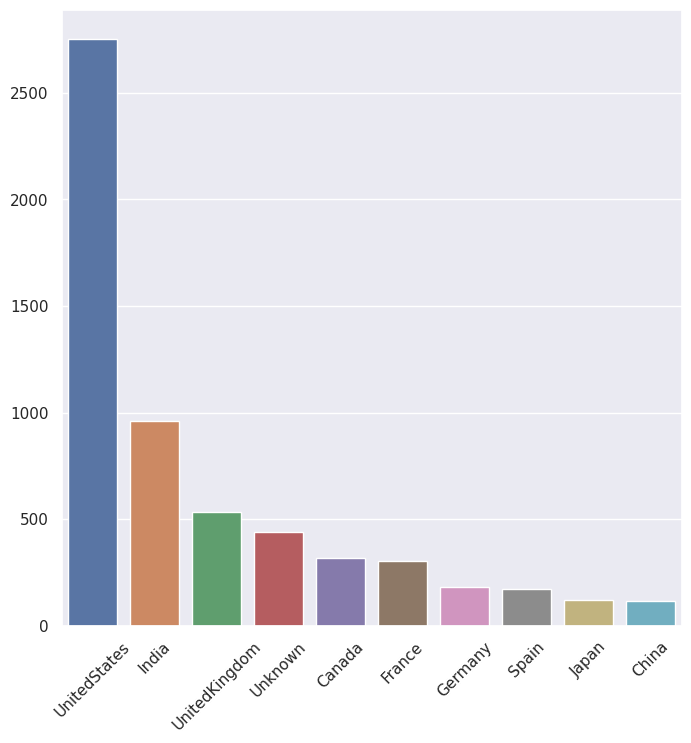

In [28]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45)

## Анализ продолжительности фильмов

In [29]:
netflix_movies['duration'].fillna('0 min', inplace=True)

In [30]:
netflix_movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [31]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

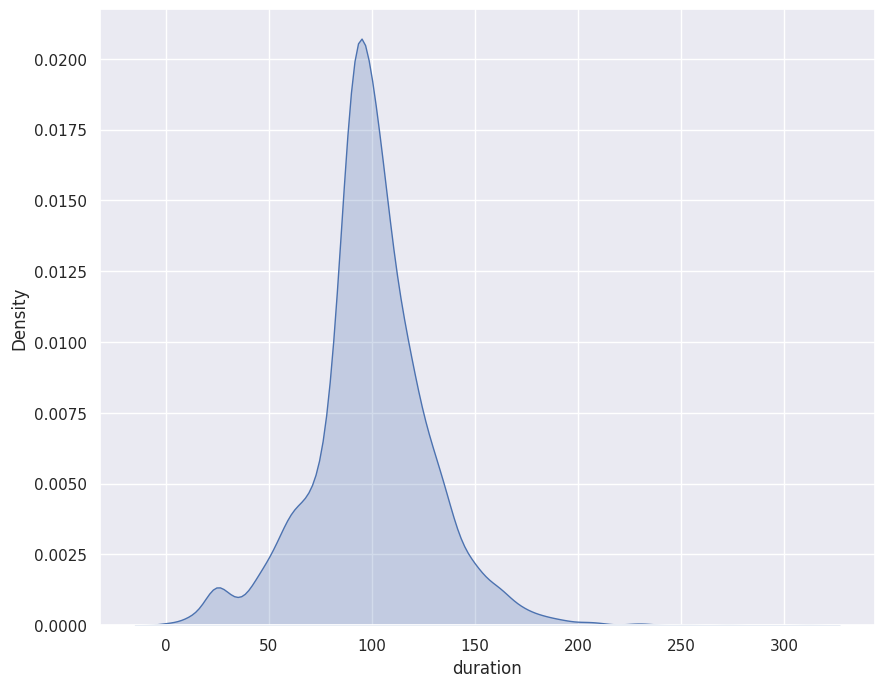

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
sns.kdeplot(data=netflix_movies['duration'], fill=True)

Средняя длительность фильмов от 75-120 минут

## Анализ жанров

In [33]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [34]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
  i = list(i.split(','))
  for j in i:
    gen.append(j.replace(' ', ''))

g = Counter(gen)
g

Counter({'Documentaries': 869,
         'Children&FamilyMovies': 641,
         'Dramas': 2427,
         'IndependentMovies': 756,
         'InternationalMovies': 2752,
         'Comedies': 1674,
         'Thrillers': 577,
         'RomanticMovies': 616,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Sci-Fi&Fantasy': 243,
         'Action&Adventure': 859,
         'ClassicMovies': 116,
         'AnimeFeatures': 71,
         'SportsMovies': 219,
         'CultMovies': 71,
         'Faith&Spirituality': 65,
         'LGBTQMovies': 102,
         'Stand-UpComedy': 343,
         'Movies': 57})

In [35]:
g = sorted(g.items(), key=lambda item : g[item[0]], reverse=True)
g

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [36]:
genre_names = [name for name, value in g]
genre_names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [37]:
genre_values = [value for name, value in g]
genre_values

[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

Text(0.5, 1.0, 'Genres')

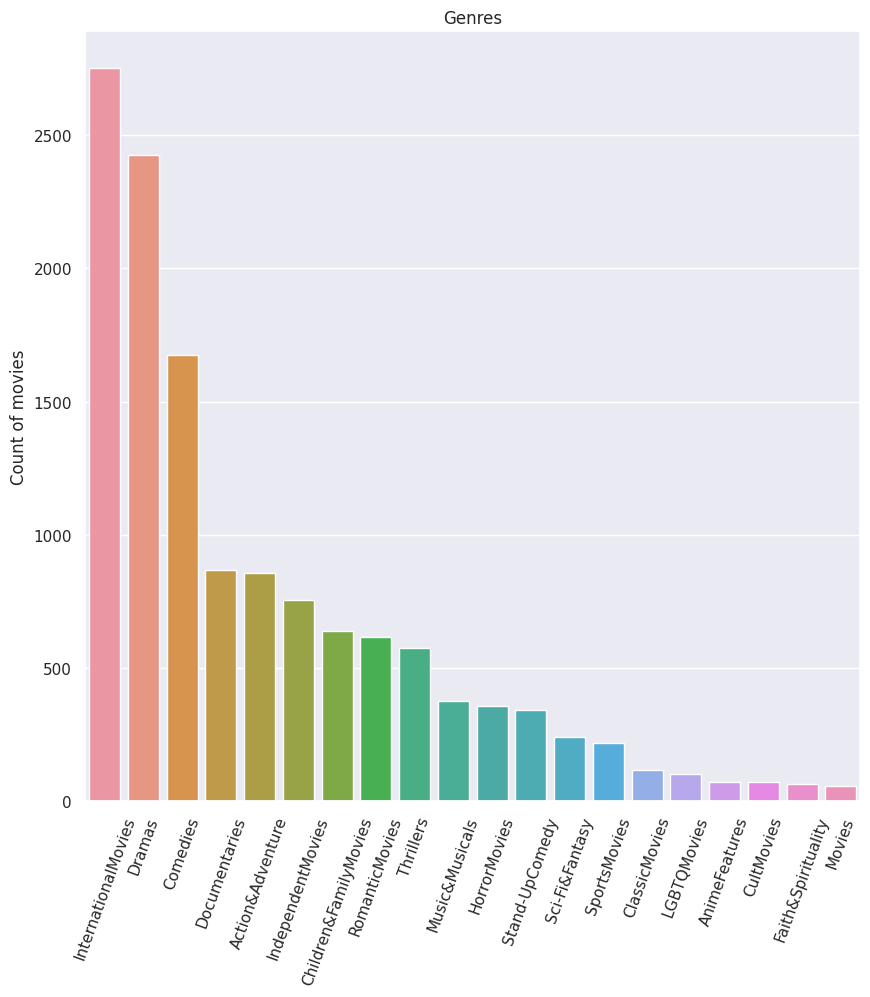

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')

Интернациональные фильмы, драмы и комедии - топовые жанры

# Анализ сериалов

## Анализ стран, выпускающих сериалы

In [39]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [40]:
netflix_shows['country'].fillna('Unknown', inplace=True)
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [41]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [42]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
  i = i.replace(' ', '')
  i = list(i.split(','))

  for j in i:
    if j in list(countries_show.keys()):
      countries_show[j]+=1
    else:
      countries_show[j]=1

countries_show

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

In [43]:
countries_fin2 = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
countries_fin2 = countries_fin2[:10]
countries_fin2

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [44]:
names = [name for name, value in countries_fin2]
names

['UnitedStates',
 'Unknown',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [45]:
values = [value for name, value in countries_fin2]
values

[938, 391, 272, 199, 170, 126, 90, 84, 70, 66]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'SouthKorea'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'France'),
 Text(7, 0, 'India'),
 Text(8, 0, 'Taiwan'),
 Text(9, 0, 'Australia')]

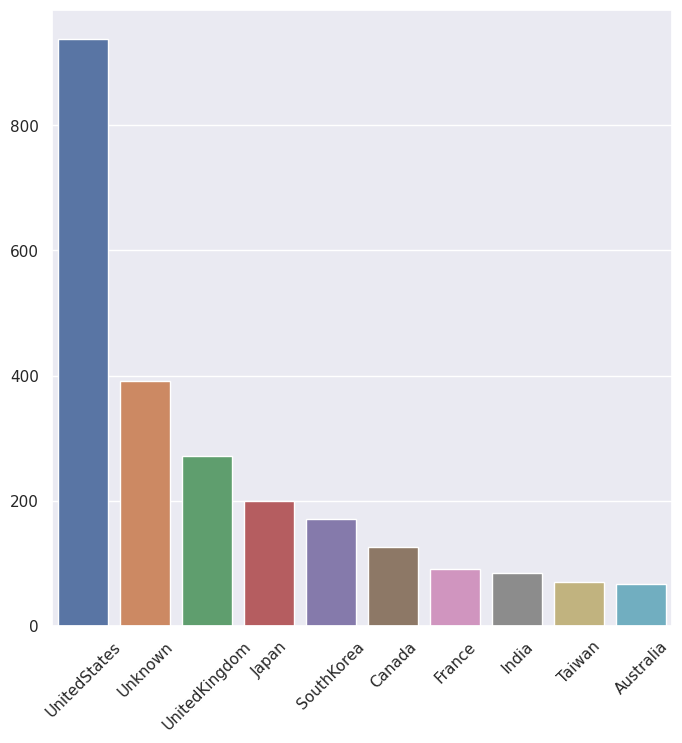

In [46]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45)

Индия не выпускает так много сериалов как фильмов. США и Великобритания лидируют на первых позициях

## Сериалы с большим количеством сезонов

In [47]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [48]:
durations['no_of_seasons'] = durations['duration'].str.replace('Season', '')
durations

<ipython-input-48-d7999dd17aeb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2 s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2 s
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 s
8796,Yunus Emre,2 Seasons,2 s
8797,Zak Storm,3 Seasons,3 s
8800,Zindagi Gulzar Hai,1 Season,1


In [49]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations

<ipython-input-49-992da0e80025>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [50]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)
durations

<ipython-input-50-7712e46e9eff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [51]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

([<matplotlib.axis.XTick at 0x7f0c8eff3280>,
 [Text(0.0, 0, "Grey's Anatomy"),
  Text(1.0, 0, 'Supernatural'),
  Text(2.0, 0, 'NCIS'),
  Text(3.0, 0, 'Heartland'),
  Text(4.0, 0, 'COMEDIANS of the world'),
  Text(5.0, 0, 'Red vs. Blue'),
  Text(6.0, 0, 'Trailer Park Boys'),
  Text(7.0, 0, 'Criminal Minds'),
  Text(8.0, 0, 'Frasier'),
  Text(9.0, 0, 'Cheers'),
  Text(10.0, 0, 'Shameless (U.S.)'),
  Text(11.0, 0, 'Friends'),
  Text(12.0, 0, 'LEGO Ninjago: Masters of Spinjitzu'),
  Text(13.0, 0, 'Danger Mouse: Classic Collection'),
  Text(14.0, 0, 'The Walking Dead'),
  Text(15.0, 0, 'Stargate SG-1'),
  Text(16.0, 0, "Dad's Army"),
  Text(17.0, 0, 'The Great British Baking Show'),
  Text(18.0, 0, 'Forensic Files'),
  Text(19.0, 0, 'The Office (U.S.)')])

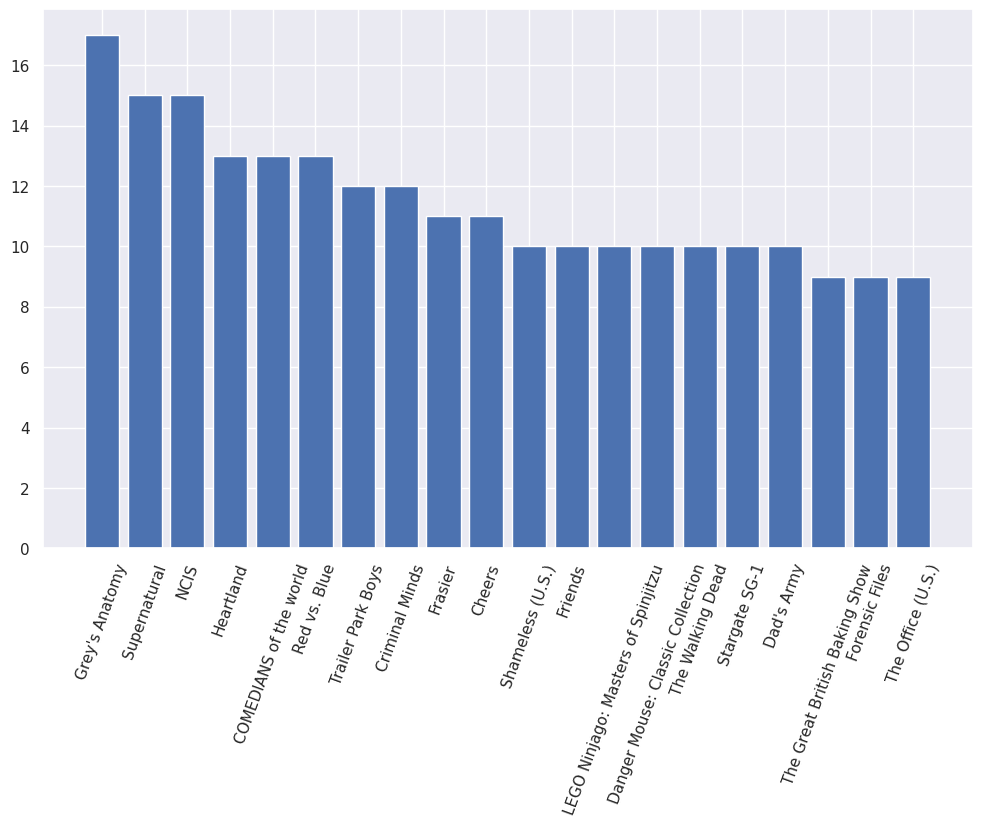

In [52]:
top20 = top[0:20]
plt.figure(figsize=(12,7))
plt.bar(top20['title'], top20['no_of_seasons'])
plt.xticks(top20['title'], rotation=70)

## Наименьшее количество сезонов

In [53]:
import plotly.graph_objects as go

bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

fig = go.Figure(
    data=[
        go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'], bottom['no_of_seasons']]))
    ]
)

fig.show()

## Анализ жанров

In [54]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [55]:
from collections import Counter

genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
  i = list(i.split(','))
  for j in i:
    gen.append(j.replace(' ', ''))

g = Counter(gen)
g

Counter({'InternationalTVShows': 1351,
         'TVDramas': 763,
         'TVMysteries': 98,
         'CrimeTVShows': 470,
         'TVAction&Adventure': 168,
         'Docuseries': 395,
         'RealityTV': 255,
         'RomanticTVShows': 370,
         'TVComedies': 581,
         'TVHorror': 75,
         'BritishTVShows': 253,
         'Spanish-LanguageTVShows': 174,
         'TVThrillers': 57,
         "Kids'TV": 451,
         'TVSci-Fi&Fantasy': 84,
         'AnimeSeries': 176,
         'KoreanTVShows': 151,
         'Science&NatureTV': 92,
         'TeenTVShows': 69,
         'TVShows': 16,
         'Stand-UpComedy&TalkShows': 56,
         'Classic&CultTV': 28})

In [56]:
g = sorted(g.items(), key=lambda item : g[item[0]], reverse=True)
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [57]:
genre_names = [name for name, value in g]
genre_names

['InternationalTVShows',
 'TVDramas',
 'TVComedies',
 'CrimeTVShows',
 "Kids'TV",
 'Docuseries',
 'RomanticTVShows',
 'RealityTV',
 'BritishTVShows',
 'AnimeSeries',
 'Spanish-LanguageTVShows',
 'TVAction&Adventure',
 'KoreanTVShows',
 'TVMysteries',
 'Science&NatureTV',
 'TVSci-Fi&Fantasy',
 'TVHorror',
 'TeenTVShows',
 'TVThrillers',
 'Stand-UpComedy&TalkShows',
 'Classic&CultTV',
 'TVShows']

In [58]:
genre_values = [value for name, value in g]
genre_values

[1351,
 763,
 581,
 470,
 451,
 395,
 370,
 255,
 253,
 176,
 174,
 168,
 151,
 98,
 92,
 84,
 75,
 69,
 57,
 56,
 28,
 16]

Text(0.5, 1.0, 'Genres')

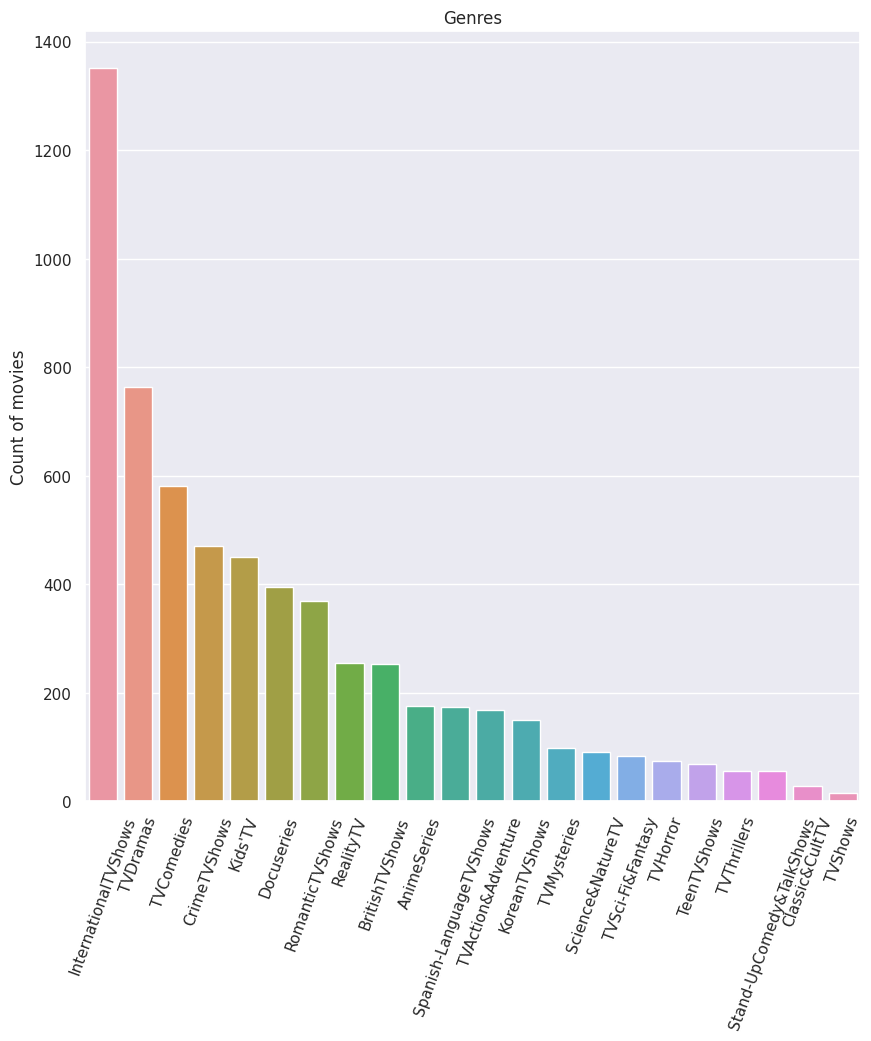

In [59]:
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')

Интернациональные фильмы, драмы и комедии - топовые жанры

## Анализ продолжительности сериалов

<ipython-input-60-a374d4a97f13>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




([<matplotlib.axis.XTick at 0x7f0c8d5c5d20>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17')])

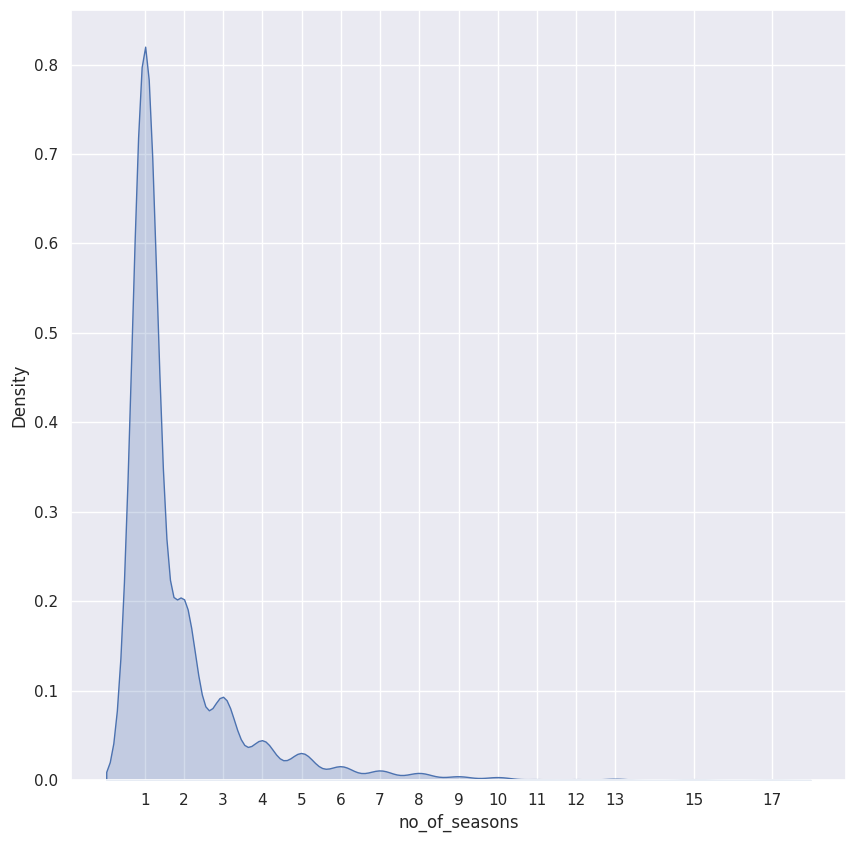

In [60]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
sns.kdeplot(data=durations['no_of_seasons'], shade=True)
plt.xticks(sorted(durations['no_of_seasons'].unique()))

# Система рекомендаций (content base)

Посмотрим описание фильмов

In [61]:
netflix_movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Зполним пропуски

In [63]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isna().sum()

0

In [64]:
netflix_movies['description'].head()

0     As her father nears the end of his life, filmm...
6     Equestria's divided. But a bright-eyed hero be...
7     On a photo shoot in Ghana, an American model s...
9     A woman adjusting to life after a loss contend...
12    After most of her family is murdered in a terr...
Name: description, dtype: object

In [65]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])

tfidf_matrix.shape

(6131, 15483)

Здесь 15483 слов, которые описывают 6131 фильмов

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [67]:
cosine_sim.shape

(6131, 6131)

In [68]:
indices = pd.Series(netflix_movies.index, index=netflix_movies['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [69]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [70]:
def get_recomendations(title, cosine_sim=cosine_sim_df):
  idx = indices[title]

  # Получаем похожести для этого фильма
  sim_scores = list(enumerate(cosine_sim_df.loc[title]))

  # Сортируем фильмы, основываясь на похожести
  sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse=True)
  sim_scores = sim_scores[1:11]

  # Получаем индексы фильма
  movie_indices = [i[0] for i in sim_scores]

  return netflix_movies['title'].iloc[movie_indices]

Рекомендации, основанные на сюжете

In [72]:
netflix_movies[netflix_movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [73]:
get_recomendations('Last Breath')

7061                                          In The Deep
940                        Motu Patlu: Deep Sea Adventure
2703                                               Mine 9
6466                                       Chicken Little
7616                               NOVA: Thai Cave Rescue
636                                          The Ice Road
5773    My Little Pony Equestria Girls: Legend of Ever...
4616                                          Big Miracle
895                                                Oxygen
3070                                              Posesif
Name: title, dtype: object

In [78]:
netflix_movies[netflix_movies['title'] == 'In The Deep'].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'

In [80]:
cosine_sim_df['Last Breath'].sort_values(ascending=False)

title
Last Breath                       1.000000
In The Deep                       0.263331
Motu Patlu: Deep Sea Adventure    0.193887
Mine 9                            0.152162
Chicken Little                    0.141503
                                    ...   
The Lovers                        0.000000
Seth Meyers: Lobby Baby           0.000000
Luccas Neto in: Summer Camp       0.000000
Shadow                            0.000000
Zubaan                            0.000000
Name: Last Breath, Length: 6131, dtype: float64